In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
df = pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
# convert the quality mapping
quality_mapping = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}
df.loc[:, "quality"] = df.quality.map(quality_mapping)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,4


In [9]:
#train test split (1143 rows in total)
df = df.sample(frac = 1).reset_index(drop = True)
df_train = df.head(800)
df_test = df.tail(343)

In [10]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth = 3)

#the columns to train on
cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [11]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

#calculate the accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [12]:
print(train_accuracy, test_accuracy)

0.635 0.5247813411078717


In [13]:
#demonstrate the concept of overfitting my changing the "max-depth" in DecisionTreeClassifier
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#label text settings
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

#ensure the plot is displayed inside the notebook
%matplotlib inline

#record train and test accuracies
train_accuracies = []
test_accuracies = []

#iterate over "max-depth" values
for depth in range(1, 25):
    #init the model
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    
    #fit the model on given features in "cols"
    clf.fit(df_train[cols], df_train.quality)
    
    #create train & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    #creat train & test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    #append accuracies into the arrays
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


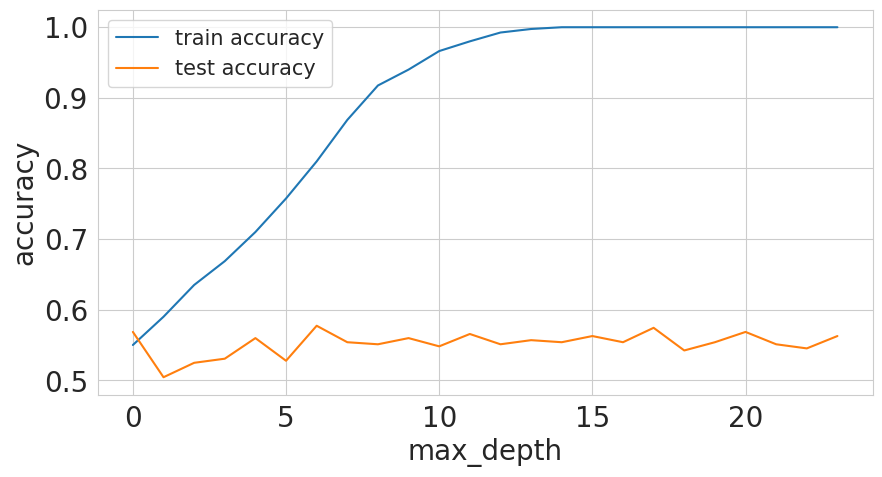

In [15]:
#plot how train and test accuracies evolved
plt.figure(figsize = (10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label = "train accuracy")
plt.plot(test_accuracies, label = "test accuracy")
plt.legend(loc = "upper left", prop = {'size' : 15})
plt.xlabel("max_depth", size = 20)
plt.ylabel("accuracy", size = 20)
plt.show()